## Training Your Model, and Using It to Clean Your Data

In [1]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

In [2]:
path = Path('data/vwGolfsBingCombined2Split')

In [3]:
cars = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=GrandparentSplitter(),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())

In [4]:
dls = cars.dataloaders(path)

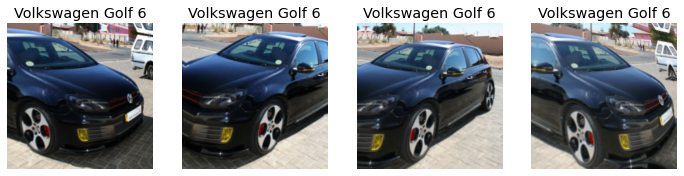

In [5]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [6]:
learn = cnn_learner(dls, models.resnet50, metrics=accuracy)
learn.fine_tune(10) # should be 100 for best accuracy

epoch,train_loss,valid_loss,accuracy,time
0,2.514130,1.818094,0.463158,03:58


epoch,train_loss,valid_loss,accuracy,time
0,1.298063,1.139078,0.621053,05:08
1,1.034941,0.816199,0.729825,05:31
2,0.812309,0.742225,0.757895,05:03
3,0.657676,0.644134,0.800000,04:56
4,0.520162,0.622715,0.814035,04:51
5,0.410716,0.399202,0.870175,04:52
6,0.329828,0.375494,0.887719,04:36
7,0.258294,0.414006,0.859649,04:24
8,0.209216,0.396912,0.863158,04:19
9,0.180114,0.392859,0.859649,04:15


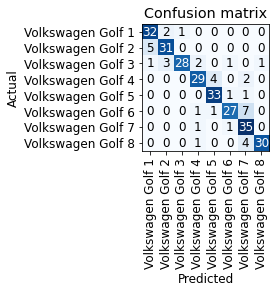

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

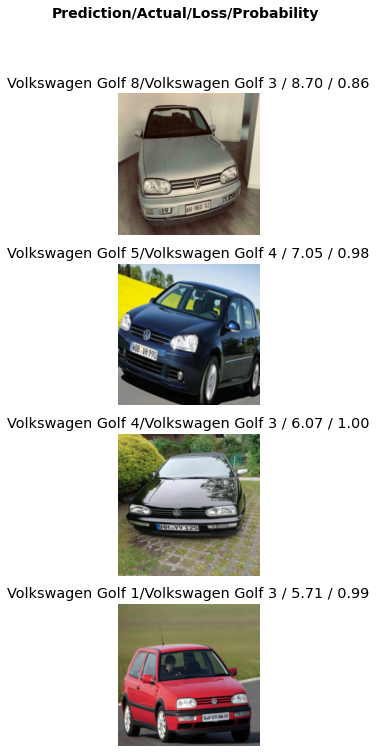

In [8]:
interp.plot_top_losses(4, nrows=4)

In [9]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [10]:
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

### Export

In [11]:
learn.export()

In [12]:
exportPath = Path()
exportPath.ls(file_exts='.pkl')

(#2) [Path('export.pkl'),Path('model.pkl')]

In [13]:
learn_inf = load_learner(exportPath/'export.pkl')

In [14]:
testImgFilePath = path/'own/Volkswagen Golf 4/Golf_4_4.jpeg'

In [15]:
learn_inf.predict(testImgFilePath)

('Volkswagen Golf 4',
 tensor(3),
 tensor([2.3181e-05, 1.5967e-06, 9.4485e-05, 9.9962e-01, 2.4333e-04, 2.3378e-06, 4.4347e-08, 1.9084e-05]))

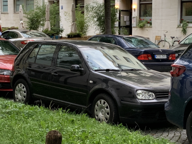

In [16]:
testImg = PILImage.create(testImgFilePath)
testImg.to_thumb(192)

### Test set

In [17]:
from os.path import join

testFolderPath = join(path, 'test')
testFolderPath

'data/vwGolfsBingCombined2Split/test'

In [18]:
testImageFiles = list(get_image_files(testFolderPath))

In [19]:
testDl = dls.test_dl(test_items=testImageFiles, with_labels=True)

In [20]:
validFolderPath = join(path, 'valid')
validFolderPath

'data/vwGolfsBingCombined2Split/valid'

In [21]:
validImageFiles = list(get_image_files(validFolderPath))

In [22]:
validDl = dls.test_dl(test_items=validImageFiles, with_labels=True)

In [23]:
ownTestFolderPath = join(path, 'own')
ownTestImageFiles = list(get_image_files(ownTestFolderPath))
ownTestDl = dls.test_dl(test_items=ownTestImageFiles, with_labels=True)

In [24]:
learn_inf.validate(dl=dls.valid)

(#2) [0.392858624458313,0.859649121761322]

In [25]:
learn_inf.validate(dl=validDl)

(#2) [0.392858624458313,0.859649121761322]

In [26]:
learn_inf.validate(dl=testDl)

(#2) [0.40333980321884155,0.870192289352417]

In [27]:
learn_inf.validate(dl=ownTestDl)

(#2) [0.7800771594047546,0.8103448152542114]

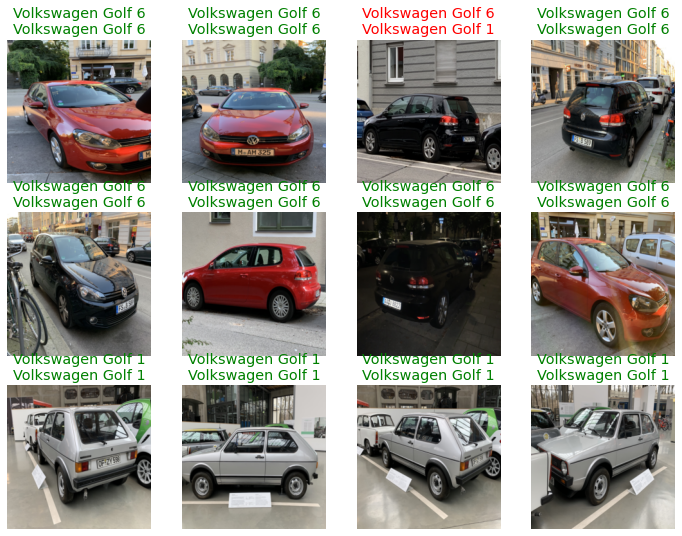

In [28]:
learn_inf.show_results(dl=ownTestDl, max_n=16)